In [1]:
print("Hello World")

Hello World


# Installing Dependencies

In [2]:
%pip install pandas matplotlib numpy seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Main Code

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: ylabel='Age'>

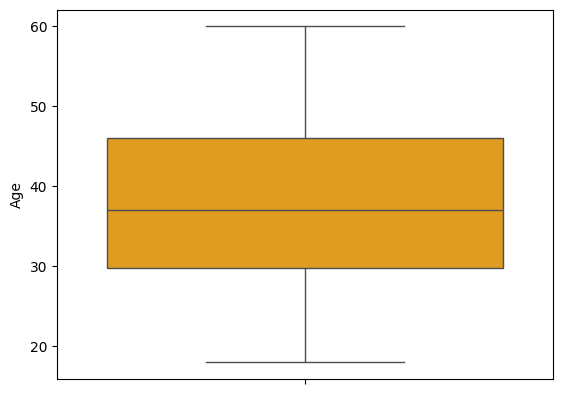

In [8]:
sns.boxplot(df["Age"],color="orange")

<Axes: ylabel='EstimatedSalary'>

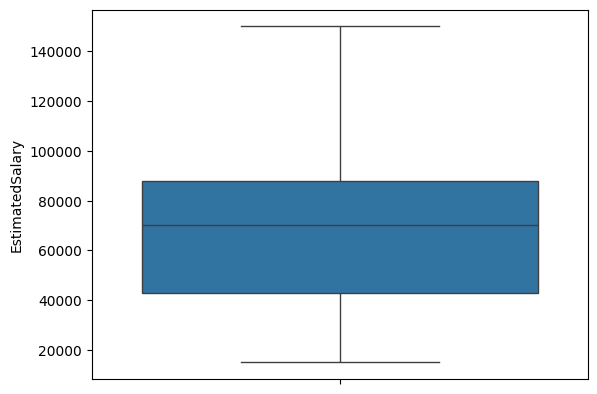

In [9]:
sns.boxplot(df["EstimatedSalary"])

<Axes: >

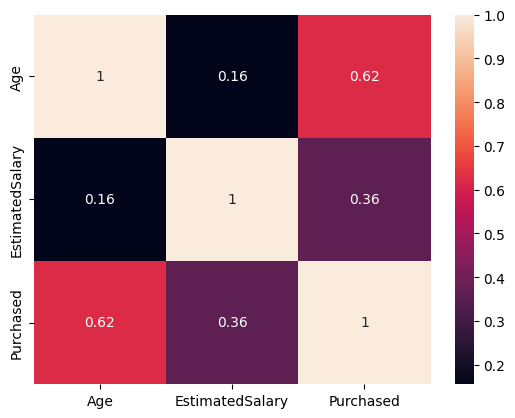

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [12]:
x=df.drop(["Purchased"],axis=1)
y=df["Purchased"]

In [13]:
x=ss.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=40,random_state=0)

In [16]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40, random_state=0)

In [17]:
y_pred=np.matrix.round(rf.predict(x_test))

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[46  6]
 [ 5 23]]


In [19]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy :",acc*100)

Accuracy : 86.25
